<a href="https://colab.research.google.com/github/Dolphuwadol/sentiment-analysis-on-fin-doc/blob/main/sentiment_analysis_on_fin_doc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import data

In [ ]:
%%capture
pip install pythainlp

In [ ]:
import pandas as pd
import numpy as np
from pythainlp import word_tokenize
from tqdm import tqdm_notebook
import re

import matplotlib.pyplot as plt
import seaborn as sns

### Text Processor

In [ ]:
def replace_rep(text):
    def _replace_rep(m):
        c,cc = m.groups()
        return f'{c}xxrep'
    re_rep = re.compile(r'(\S)(\1{2,})')
    return re_rep.sub(_replace_rep,text)

def process_text(text):
    #tokenize
    res = [word for word in word_tokenize(text) if word and not re.search(pattern=r"\s+", string=word)]

    return res

In [ ]:
url = 'https://raw.githubusercontent.com/nlp-chula/finnlp-sentiment/main/56-1dataset_50.csv'
all_df = pd.read_csv(url, skipinitialspace=True, encoding='UTF-8')

# ดึงเอาเฉพาะคอลัมน์ที่ต้องการ
all_df_sa = all_df[['paragraph','sentiment']]
all_df_aspect = all_df[['paragraph','aspect']]

# เปลี่ยนชื่อคอลัมน์
all_df_sa  = all_df_sa .rename(columns={'paragraph': 'text', 'sentiment':'labels'})
all_df_aspect  = all_df_aspect .rename(columns={'paragraph': 'text', 'aspect':'labels'})

In [ ]:
all_df_sa

,text,labels
0,ภาพรวมบมจ.เอเชียเอวิเอชั่นดำเนินธุรกิจหลักเกี่...,Neutral
1,โดยหักส่วนของผู้ถือหุ้นที่ไม่มีอำนาจควบคุมที่A...,Neutral
2,เกณฑ์ในการจัดทางบการเงินงบการเงินรวมและงบการเง...,Neutral
3,รายได้และค่าใช้จ่ายร้อยละ55.0ตามอัตราส่วนที่บม...,Neutral
4,ภาพรวมเศรษฐกิจโลกในปี2558มีดังนี้้ในเดือนมกราค...,Neutral
...,...,...
12253,Participation2)นั่นคือการเข้าไปพบปะผู้นำชุมชนใ...,Positive
12254,เอชเอชลบุรี1(WHACIE1)นิคมฯดับบลิวเอชเอตะวันออก...,Positive
12255,นอกจากนั้นในปี2562บริษัทดับบลิวเอชเออินดัสเตรี...,Positive
12256,โดยรางวัล“องค์กรที่มีผลงานด้านความรับผิดชอบต่อ...,Positive


In [ ]:
all_df_aspect

,text,labels
0,ภาพรวมบมจ.เอเชียเอวิเอชั่นดำเนินธุรกิจหลักเกี่...,Profit/Loss
1,โดยหักส่วนของผู้ถือหุ้นที่ไม่มีอำนาจควบคุมที่A...,Profit/Loss
2,เกณฑ์ในการจัดทางบการเงินงบการเงินรวมและงบการเง...,Governance
3,รายได้และค่าใช้จ่ายร้อยละ55.0ตามอัตราส่วนที่บม...,Profit/Loss
4,ภาพรวมเศรษฐกิจโลกในปี2558มีดังนี้้ในเดือนมกราค...,Economics
...,...,...
12253,Participation2)นั่นคือการเข้าไปพบปะผู้นำชุมชนใ...,Social&People
12254,เอชเอชลบุรี1(WHACIE1)นิคมฯดับบลิวเอชเอตะวันออก...,Brand
12255,นอกจากนั้นในปี2562บริษัทดับบลิวเอชเออินดัสเตรี...,Brand
12256,โดยรางวัล“องค์กรที่มีผลงานด้านความรับผิดชอบต่อ...,Social&People


In [ ]:
def load_data(train, dev, test):
    train_df = pd.read_csv(train, encoding='UTF-8')
    dev_df = pd.read_csv(dev, encoding='UTF-8')
    test_df = pd.read_csv(test, encoding='UTF-8')

    return train_df, dev_df, test_df

In [ ]:
train = 'https://raw.githubusercontent.com/nlp-chula/finnlp-sentiment/main/dataset/train.csv'
dev  = 'https://raw.githubusercontent.com/nlp-chula/finnlp-sentiment/main/dataset/dev.csv'
test = 'https://raw.githubusercontent.com/nlp-chula/finnlp-sentiment/main/dataset/test.csv'

In [ ]:
train_df_sa, dev_df_sa, test_df_sa = load_data(train, dev, test)
train_df_aspect, dev_df_aspect, test_df_aspect = load_data(train, dev, test)

In [ ]:
train_df_sa.head(5)

,Unnamed: 0,year,paragraph,tokenized,aspect,sentiment,Brand,Dividend,Economics,Environment,...,Others,Political,Product/Service,Profit/Loss,Rating,Social&People,Technology,Negative,Neutral,Positive
0,0,2015,ภาพรวมบมจ.เอเชียเอวิเอชั่นดำเนินธุรกิจหลักเกี่...,ภาพรวม|บมจ.|เอเชีย|ชั่น|ดำเนิน|ธุรกิจ|หลัก|การ...,Profit/Loss,Neutral,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,2015,โดยหักส่วนของผู้ถือหุ้นที่ไม่มีอำนาจควบคุมที่A...,หัก|ผู้ถือหุ้น|มีอำนาจ|ควบคุม|ร้อยละ|ไทย|แอร์|...,Profit/Loss,Neutral,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,2015,เกณฑ์ในการจัดทางบการเงินงบการเงินรวมและงบการเง...,เกณฑ์|งบการเงิน|งบการเงิน|งบการเงิน|บริษัท|ตาม...,Governance,Neutral,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,2015,รายได้และค่าใช้จ่ายร้อยละ55.0ตามอัตราส่วนที่บม...,รายได้|ค่าใช้จ่าย|ร้อยละ|อัตราส่วน|บมจ.|เอเชีย...,Profit/Loss,Neutral,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,4,2015,ภาพรวมเศรษฐกิจโลกในปี2558มีดังนี้้ในเดือนมกราค...,ภาพรวม|เศรษฐกิจ|โลก|ดังนี้|เดือน|มกราคม|กองทุน...,Economics,Neutral,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
pd.set_option('max_colwidth', None)
train_df_sa['paragraph'].head(3)

0                                                                                                                                                             ภาพรวมบมจ.เอเชียเอวิเอชั่นดำเนินธุรกิจหลักเกี่ยวกับการลงทุนในบริษัทที่ดำเนินธุรกิจสายการบินราคาประหยัดซึ่งคือบจ.ไทยแอร์เอเชีย(บริษัทย่อย)โดยมีส่วนได้ส่วนเสียจากการถือหุ้นร้อยละ55ดังนั้นรายได้บมจ.เอเชียเอวิเอชั่นมาจากผลประกอบการของบจ.ไทยแอร์เอเชียเป็นหลักในการจัดทางบการเงินรวมของบมจ.เอเชียเอวิเอชั่นจะรวมงบการเงินของบจ.ไทยแอร์เอเชียเข้าในงบการเงินรวมของบมจ.เอเชียเอวิเอชั่นอย่างเต็มรูปแบบ(FullConsolidation)
1                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [ ]:
#train_df['tokenized'].head(3)

In [ ]:
print("จำนวนแถวและคอลัมน์ของข้อมูล")
print("Train: ", train_df_sa.shape)
print("Dev  : ", train_df_sa.shape)
print("Test : ", train_df_sa.shape)

จำนวนแถวและคอลัมน์ของข้อมูล
Train:  (8191, 25)
Dev  :  (8191, 25)
Test :  (8191, 25)


### Tokenize

In [ ]:
# เลือกเฉพาะคอลัมน์ที่ต้องใช้
train_df = train_df_sa[['paragraph','sentiment']]
dev_df = dev_df_sa[['paragraph','sentiment']]
test_df = test_df_sa[['paragraph','sentiment']]

# เปลี่ยนชื่อคอลัมน์
train_df = train_df.rename(columns={'paragraph': 'text', 'sentiment':'labels'})
dev_df = dev_df.rename(columns={'paragraph': 'text', 'sentiment':'labels'})
test_df = test_df.rename(columns={'paragraph': 'text', 'sentiment':'labels'})

In [ ]:
pd.reset_option('max_colwidth')
train_df

,text,labels
0,ภาพรวมบมจ.เอเชียเอวิเอชั่นดำเนินธุรกิจหลักเกี่...,Neutral
1,โดยหักส่วนของผู้ถือหุ้นที่ไม่มีอำนาจควบคุมที่A...,Neutral
2,เกณฑ์ในการจัดทางบการเงินงบการเงินรวมและงบการเง...,Neutral
3,รายได้และค่าใช้จ่ายร้อยละ55.0ตามอัตราส่วนที่บม...,Neutral
4,ภาพรวมเศรษฐกิจโลกในปี2558มีดังนี้้ในเดือนมกราค...,Neutral
...,...,...
8186,โครงการจัดตั้งศูนย์การออกแบบผลิตภัณฑ์อุปกรณ์เส...,Positive
8187,โครงการการร่วมวิจัยและสนับสนุนสถาบันการศึกษาโด...,Positive
8188,78|หน้านอกจากนี้บริษัทฯได้สนับสนุนทุนการศึกษาแ...,Positive
8189,บริษัทฯได้ให้ร่วมมือกับสถาบันจัดทำโครงการการฝึ...,Positive


Tokenize

In [ ]:
#All data sentiment
all_df_sa['processed'] = all_df_sa.text.map(lambda x: '|'.join(process_text(x)))
all_df_sa['wc'] = all_df_sa.processed.map(lambda x: len(x.split('|')))
all_df_sa['uwc'] = all_df_sa.processed.map(lambda x: len(set(x.split('|'))))

#Train_df
train_df['processed'] = train_df.text.map(lambda x: '|'.join(process_text(x)))
train_df['wc'] = train_df.processed.map(lambda x: len(x.split('|')))
train_df['uwc'] = train_df.processed.map(lambda x: len(set(x.split('|'))))

#dev_df
dev_df['processed'] = dev_df.text.map(lambda x: '|'.join(process_text(x)))
dev_df['wc'] = dev_df.processed.map(lambda x: len(x.split('|')))
dev_df['uwc'] = dev_df.processed.map(lambda x: len(set(x.split('|'))))

#Test_df
test_df['processed'] = test_df.text.map(lambda x: '|'.join(process_text(x)))
test_df['wc'] = test_df.processed.map(lambda x: len(x.split('|')))
test_df['uwc'] = test_df.processed.map(lambda x: len(set(x.split('|'))))

In [ ]:
train_df.head(5)
# wc : จำนวนคำทั้งหมด
# uwc : จำนวนคำที่ไม่รวมคำซ้ำทั้งหมด

,text,labels,processed,wc,uwc
0,ภาพรวมบมจ.เอเชียเอวิเอชั่นดำเนินธุรกิจหลักเกี่...,Neutral,ภาพรวม|บมจ.|เอเชีย|เอ|วิ|เอ|ชั่น|ดำเนิน|ธุรกิจ...,95,52
1,โดยหักส่วนของผู้ถือหุ้นที่ไม่มีอำนาจควบคุมที่A...,Neutral,โดย|หัก|ส่วน|ของ|ผู้ถือหุ้น|ที่|ไม่|มีอำนาจ|คว...,21,20
2,เกณฑ์ในการจัดทางบการเงินงบการเงินรวมและงบการเง...,Neutral,เกณฑ์|ใน|การ|จัด|ทา|งบการเงิน|งบการเงิน|รวม|แล...,95,62
3,รายได้และค่าใช้จ่ายร้อยละ55.0ตามอัตราส่วนที่บม...,Neutral,รายได้|และ|ค่าใช้จ่าย|ร้อยละ|55.0|ตาม|อัตราส่ว...,75,45
4,ภาพรวมเศรษฐกิจโลกในปี2558มีดังนี้้ในเดือนมกราค...,Neutral,ภาพรวม|เศรษฐกิจ|โลก|ใน|ปี|2558|มี|ดังนี้|้|ใน|...,19,18


In [ ]:
train_df.values.tolist()[0]

['ภาพรวมบมจ.เอเชียเอวิเอชั่นดำเนินธุรกิจหลักเกี่ยวกับการลงทุนในบริษัทที่ดำเนินธุรกิจสายการบินราคาประหยัดซึ่งคือบจ.ไทยแอร์เอเชีย(บริษัทย่อย)โดยมีส่วนได้ส่วนเสียจากการถือหุ้นร้อยละ55ดังนั้นรายได้บมจ.เอเชียเอวิเอชั่นมาจากผลประกอบการของบจ.ไทยแอร์เอเชียเป็นหลักในการจัดทางบการเงินรวมของบมจ.เอเชียเอวิเอชั่นจะรวมงบการเงินของบจ.ไทยแอร์เอเชียเข้าในงบการเงินรวมของบมจ.เอเชียเอวิเอชั่นอย่างเต็มรูปแบบ(FullConsolidation)',
 'Neutral',
 'ภาพรวม|บมจ.|เอเชีย|เอ|วิ|เอ|ชั่น|ดำเนิน|ธุรกิจ|หลัก|เกี่ยวกับ|การลงทุน|ใน|บริษัท|ที่|ดำเนิน|ธุรกิจ|สายการบิน|ราคา|ประหยัด|ซึ่ง|คือ|บ|จ.|ไทย|แอร์|เอเชีย|(|บริษัท|ย่อย|)|โดย|มี|ส่วนได้ส่วนเสีย|จาก|การ|ถือหุ้น|ร้อยละ|55|ดังนั้น|รายได้|บมจ.|เอเชีย|เอ|วิ|เอ|ชั่น|มาจาก|ผลประกอบการ|ขอ|งบ|จ.|ไทย|แอร์|เอเชีย|เป็นหลัก|ใน|การ|จัด|ทา|งบการเงิน|รวม|ของ|บมจ.|เอเชีย|เอ|วิ|เอ|ชั่น|จะ|รวม|งบการเงิน|ขอ|งบ|จ.|ไทย|แอร์|เอเชีย|เข้า|ใน|งบการเงิน|รวม|ของ|บมจ.|เอเชีย|เอ|วิ|เอ|ชั่น|อย่าง|เต็ม|รูปแบบ|(|FullConsolidation|)',
 95,
 52]

In [ ]:
train_df['processed'].values.tolist()[0].split('|')[:5]

['ภาพรวม', 'บมจ.', 'เอเชีย', 'เอ', 'วิ']

In [ ]:
all_df_sa.labels.value_counts() / all_df_sa.shape[0]

Neutral     0.441100
Positive    0.396313
Negative    0.162588
Name: labels, dtype: float64

### Sentiment Analysis(Bag-of-Word)

กลุ่มรวมของคำที่มีคำทั้งหมดในตารางเทียบกับคำที่มีในแต่ละ row

In [ ]:
y_train = train_df['labels']
y_valid = dev_df['labels']
y_test  = test_df['labels']

In [ ]:
#text faetures
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
tfidf = TfidfVectorizer(tokenizer=process_text, ngram_range=(1,2), min_df=20, sublinear_tf=True)
"""
    ngram_range  : # [โดย+หัก] # ngram = 2
                   # [โดย,หัก,ส่วน] # ngram = 3
    min_df       : ต้องมีคำนี้ 20 คำขึ้นไปถึงจะแสดงใน BOW
    sublinear_tf : ต้องการสเกลมั้ยสูตรคือ 1 + log(tf)
"""
tfidf_fit = tfidf.fit(all_df_sa['text'])
text_train = tfidf_fit.transform(train_df['text'])
text_valid = tfidf_fit.transform(dev_df['text'])
text_test = tfidf_fit.transform(test_df['text'])
text_train.shape, text_valid.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



((8191, 10840), (1756, 10840))

Tokenizer

In [ ]:
train_df.values.tolist()[1]

['โดยหักส่วนของผู้ถือหุ้นที่ไม่มีอำนาจควบคุมที่AAIถืออยู่ร้อยละ45.0ในบจ.ไทยแอร์เอเชีย',
 'Neutral',
 'โดย|หัก|ส่วน|ของ|ผู้ถือหุ้น|ที่|ไม่|มีอำนาจ|ควบคุม|ที่|AAI|ถือ|อยู่|ร้อยละ|45.0|ใน|บ|จ.|ไทย|แอร์|เอเชีย',
 21,
 20]

In [ ]:
train_df['processed'].values.tolist()[1].split('|')[:5]

['โดย', 'หัก', 'ส่วน', 'ของ', 'ผู้ถือหุ้น']

In [ ]:
tfidf.get_feature_names_out() #คำทั้งหมดในตาราง

array(['\x08', '\x08 เกี่ยวข้อง', '\x17', ..., '\uf70bา', '\uf70bำ',
       '\uf70e'], dtype=object)

all_df_sa จะสร้างกลุ่มคำที่เจอทั้งหมดในตาราง

In [ ]:
# เอาข้อมูลแถวที่ 2 ไปเทียบกับคำที่มีใน bag of word 5 ตัวแรก
# output จะแสดงตำแหน่งใน array ที่มีคำตรงกันใน BOW
[np.where(tfidf.get_feature_names_out() == x) for x in train_df['processed'].values.tolist()[1].split('|')[:5]]

[(array([9900]),),
 (array([7695]),),
 (array([7500]),),
 (array([1512]),),
 (array([5278]),)]

ngram_range

In [ ]:
train_df['processed'].values.tolist()[1].split('|')[:5] # ngram = 1

# [โดย+หัก] # ngram = 2
# [โดย,หัก,ส่วน] # ngram = 3

['โดย', 'หัก', 'ส่วน', 'ของ', 'ผู้ถือหุ้น']

In [ ]:
# แปลงชุดข้อความเป็น array
X_train = text_train.toarray()
X_valid = text_valid.toarray()
X_test = text_test.toarray()
X_train.shape, X_valid.shape

((8191, 10840), (1756, 10840))

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Fit Model

In [ ]:
# logistic regression
model = LogisticRegression(C=2., penalty='l2', solver='liblinear', dual=False, multi_class='ovr')
model.fit(X_train, y_train)
model.score(X_valid, y_valid)

0.714123006833713

In [ ]:
# ทำนายของ Validation set
probs_v = model.predict_proba(X_valid)
probs_valid = pd.DataFrame(probs_v)
probs_valid.columns = model.classes_
probs_valid['preds'] = model.predict(X_valid)
probs_valid['labels'] = dev_df.labels
probs_valid['texts'] = dev_df.processed
probs_valid['wc'] = dev_df.wc
probs_valid['uwc'] = dev_df.uwc
probs_valid['hit'] = (probs_valid.preds==probs_valid.labels)

In [ ]:
probs_valid

,Negative,Neutral,Positive,preds,labels,texts,wc,uwc,hit
0,0.013183,0.560807,0.426010,Neutral,Neutral,-|ปรับปรุง|เกณฑ์|การประเมิน|บุคลากร|ประจำปี|ให...,37,33,True
1,0.020706,0.603237,0.376057,Neutral,Neutral,-|จัด|ทา|นโยบาย|และ|กระบวนการ|เส้นทาง|ความก้าว...,29,24,True
2,0.179646,0.758880,0.061474,Neutral,Neutral,2|.|ความเสี่ยง|จาก|การ|กำหนด|แผน|ธุรกิจ|หรือ|แ...,20,19,True
3,0.042723,0.831236,0.126042,Neutral,Neutral,กิจ|ของ|บริษัท|การ|กำหนด|แผน|ธุรกิจ|หรือ|แผน|ก...,137,79,True
4,0.019999,0.741953,0.238048,Neutral,Neutral,-|ทบทวน|และ|ปรับปรุง|กระบวนการ|จัด|ทา|แผน|ธุรก...,75,50,True
...,...,...,...,...,...,...,...,...,...
1751,0.007346,0.146220,0.846434,Positive,Positive,Participation|2|)|นั่น|คือ|การ|เข้าไป|พบปะ|ผู้...,209,124,True
1752,0.022920,0.192737,0.784343,Positive,Positive,เอช|เอ|ชลบุรี|1|(|WHACIE|1|)|นิคม|ฯ|ดับบลิว|เอ...,85,68,True
1753,0.019732,0.481265,0.499003,Positive,Positive,นอกจากนั้น|ใน|ปี|2562|บริษัท|ดับบลิว|เอช|เอ|อิ...,70,55,True
1754,0.003720,0.165113,0.831167,Positive,Positive,โดย|รางวัล|“|องค์กร|ที่|มี|ผลงาน|ด้าน|ความรับผ...,83,64,True


In [ ]:
from sklearn.metrics import classification_report
y_val_pred = model.predict(X_valid)
print(classification_report(y_valid, y_val_pred))

              precision    recall  f1-score   support

    Negative       0.72      0.58      0.64       266
     Neutral       0.69      0.72      0.70       686
    Positive       0.74      0.75      0.75       804

    accuracy                           0.71      1756
   macro avg       0.71      0.68      0.70      1756
weighted avg       0.71      0.71      0.71      1756



0.714123006833713


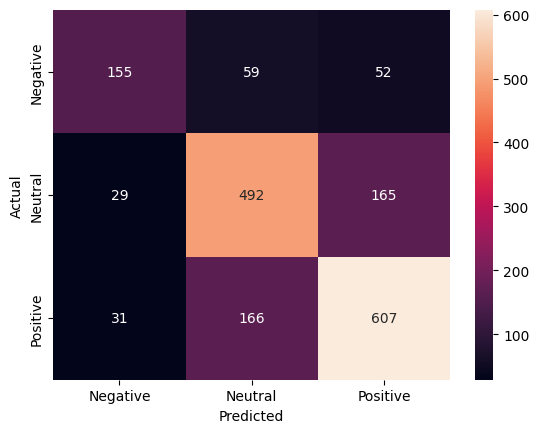

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(probs_valid.labels,probs_valid.preds)
print(model.score(X_valid,y_valid))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ทำนาย Test set

In [ ]:
preds = model.predict(text_test)
model.score(text_test, y_test)

0.7418803418803419

In [ ]:
# ทำนายของ test set
probs_t= model.predict_proba(X_test)
probs_test = pd.DataFrame(probs_t)
probs_test.columns = model.classes_
probs_test['preds'] = model.predict(X_test)
probs_test['labels'] = dev_df.labels
probs_test['texts'] = dev_df.processed
probs_test['wc'] = dev_df.wc
probs_test['uwc'] = dev_df.uwc
probs_test['hit'] = (probs_test.preds==probs_test.labels)

In [ ]:
probs_test

,Negative,Neutral,Positive,preds,labels,texts,wc,uwc,hit
0,0.715056,0.093771,0.191173,Negative,Neutral,-|ปรับปรุง|เกณฑ์|การประเมิน|บุคลากร|ประจำปี|ให...,37,33,False
1,0.088301,0.049044,0.862656,Positive,Neutral,-|จัด|ทา|นโยบาย|และ|กระบวนการ|เส้นทาง|ความก้าว...,29,24,False
2,0.750329,0.083084,0.166587,Negative,Neutral,2|.|ความเสี่ยง|จาก|การ|กำหนด|แผน|ธุรกิจ|หรือ|แ...,20,19,False
3,0.102952,0.502261,0.394787,Neutral,Neutral,กิจ|ของ|บริษัท|การ|กำหนด|แผน|ธุรกิจ|หรือ|แผน|ก...,137,79,True
4,0.324793,0.588982,0.086225,Neutral,Neutral,-|ทบทวน|และ|ปรับปรุง|กระบวนการ|จัด|ทา|แผน|ธุรก...,75,50,True
...,...,...,...,...,...,...,...,...,...
1750,0.029745,0.744399,0.225856,Neutral,Neutral,สำหรับ|การพัฒนา|โครงการ|ใหม่|ทั้ง|การพัฒนา|ศูน...,61,46,True
1751,0.029846,0.880701,0.089453,Neutral,Positive,Participation|2|)|นั่น|คือ|การ|เข้าไป|พบปะ|ผู้...,209,124,False
1752,0.005154,0.460352,0.534495,Positive,Positive,เอช|เอ|ชลบุรี|1|(|WHACIE|1|)|นิคม|ฯ|ดับบลิว|เอ...,85,68,True
1753,0.010792,0.631862,0.357346,Neutral,Positive,นอกจากนั้น|ใน|ปี|2562|บริษัท|ดับบลิว|เอช|เอ|อิ...,70,55,False


In [ ]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    Negative       0.77      0.60      0.67       323
     Neutral       0.74      0.81      0.77       821
    Positive       0.73      0.73      0.73       611

    accuracy                           0.74      1755
   macro avg       0.75      0.71      0.73      1755
weighted avg       0.74      0.74      0.74      1755



0.7418803418803419


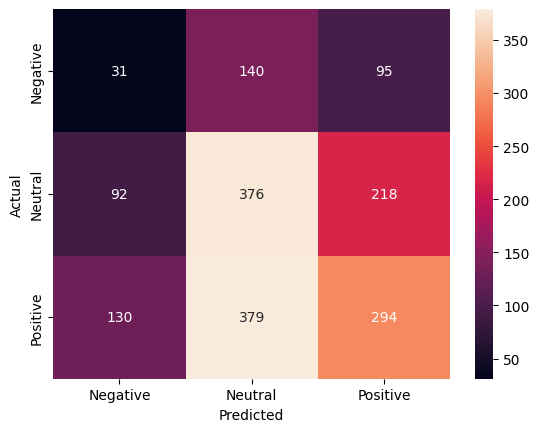

In [ ]:
conf_mat = confusion_matrix(probs_test.labels,probs_test.preds)
print(model.score(X_test,y_test))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ใช้งานจริง

In [ ]:
sample = ['โรงงานโออิชิฟู้ด เซอร์วิส ได้ดำเนินการปรับปรุงประสิทธิภาพกระบวนการผลิตปลาซาบะโดยนำระบบสายพานทดแทนการผลิตแบบเดิมสามารถลดการใช้วัตถุดิบลงได้ 10,000 กิโลกรัมต่อปี',
          'การให้ความช่วยเหลือลูกค้าของธนาคารที่ได้รับผลกระทบจากสถานการณ์การแพร่ระบาดของโรคติดเชื้อไวรัสโคโรนา 2019',
          'ธนาคารไทยพาณิชย์มีการปรับตัวและพัฒนาด้านเทคโนโลยี เพื่อตอบสนองต่อไลฟ์สไตล์ผู้บริโภคและภาคธุรกิจที่เปลี่ยนไปอย่างพอเพียงและรวดเร็ว',
          'ธนาคารให้ความสำคัญอย่างยิ่งต่อการพัฒนาระบบความปลอดภัยสารสนเทศ ซึ่งรวมถึงการเคารพและรักษาสิทธิของข้อมูล ความเป็นส่วนตัวของลูกค้า']
sample_feature = tfidf_fit.transform(sample)
model.predict(sample_feature)

array(['Positive', 'Neutral', 'Neutral', 'Neutral'], dtype=object)

In [ ]:
model_proba = model.predict_proba(sample_feature)
model_proba

array([[0.0707893 , 0.35536414, 0.57384656],
       [0.09622716, 0.65160287, 0.25216997],
       [0.11071075, 0.5565413 , 0.33274795],
       [0.02162044, 0.80186629, 0.17651327]])

Visualize

In [ ]:
import plotly.express as px

df_sentiment = pd.DataFrame(model_proba, columns=['Negative', 'Neutral', 'Positive'])

df_sentiment = df_sentiment.transpose()

df_sentiment_normalized = df_sentiment * 100

fig_sentiment = px.pie(df_sentiment_normalized, values=df_sentiment_normalized[0],
                       names= df_sentiment_normalized.index,
                       title='Sentiment Distribution',
                       labels={'index':'Sentiment','0':'Percentage'})

description = f'{sample[0]}'
fig_sentiment.update_layout(annotations=[dict(text=description, x=0.5, y=1.1, showarrow=False, xref='paper', yref='paper')])

fig_sentiment.show()

## Aspect

### Import data

In [ ]:
# เลือกเฉพาะคอลัมน์ที่ต้องใช้
train_df = train_df_aspect[['paragraph','aspect']]
dev_df = dev_df_aspect[['paragraph','aspect']]
test_df = test_df_aspect[['paragraph','aspect']]

# เปลี่ยนชื่อคอลัมน์
train_df = train_df.rename(columns={'paragraph': 'text', 'aspect':'labels'})
dev_df = dev_df.rename(columns={'paragraph': 'text', 'aspect':'labels'})
test_df = test_df.rename(columns={'paragraph': 'text', 'aspect':'labels'})

In [ ]:
train_df

,text,labels
0,ภาพรวมบมจ.เอเชียเอวิเอชั่นดำเนินธุรกิจหลักเกี่...,Profit/Loss
1,โดยหักส่วนของผู้ถือหุ้นที่ไม่มีอำนาจควบคุมที่A...,Profit/Loss
2,เกณฑ์ในการจัดทางบการเงินงบการเงินรวมและงบการเง...,Governance
3,รายได้และค่าใช้จ่ายร้อยละ55.0ตามอัตราส่วนที่บม...,Profit/Loss
4,ภาพรวมเศรษฐกิจโลกในปี2558มีดังนี้้ในเดือนมกราค...,Economics
...,...,...
8186,โครงการจัดตั้งศูนย์การออกแบบผลิตภัณฑ์อุปกรณ์เส...,Product/Service
8187,โครงการการร่วมวิจัยและสนับสนุนสถาบันการศึกษาโด...,Social&People
8188,78|หน้านอกจากนี้บริษัทฯได้สนับสนุนทุนการศึกษาแ...,Social&People
8189,บริษัทฯได้ให้ร่วมมือกับสถาบันจัดทำโครงการการฝึ...,Social&People


### Tokenize

In [ ]:
#All data aspect
all_df_aspect['processed'] = all_df_aspect.text.map(lambda x: '|'.join(process_text(x)))
all_df_aspect['wc'] = all_df_aspect.processed.map(lambda x: len(x.split('|')))
all_df_aspect['uwc'] = all_df_aspect.processed.map(lambda x: len(set(x.split('|'))))

#Train_df
train_df['processed'] = train_df.text.map(lambda x: '|'.join(process_text(x)))
train_df['wc'] = train_df.processed.map(lambda x: len(x.split('|')))
train_df['uwc'] = train_df.processed.map(lambda x: len(set(x.split('|'))))

#dev_df
dev_df['processed'] = dev_df.text.map(lambda x: '|'.join(process_text(x)))
dev_df['wc'] = dev_df.processed.map(lambda x: len(x.split('|')))
dev_df['uwc'] = dev_df.processed.map(lambda x: len(set(x.split('|'))))

#Test_df
test_df['processed'] = test_df.text.map(lambda x: '|'.join(process_text(x)))
test_df['wc'] = test_df.processed.map(lambda x: len(x.split('|')))
test_df['uwc'] = test_df.processed.map(lambda x: len(set(x.split('|'))))

In [ ]:
train_df.head(5)
# wc : จำนวนคำทั้งหมด
# uwc : จำนวนคำที่ไม่รวมคำซ้ำทั้งหมด

,text,labels,processed,wc,uwc
0,ภาพรวมบมจ.เอเชียเอวิเอชั่นดำเนินธุรกิจหลักเกี่...,Profit/Loss,ภาพรวม|บมจ.|เอเชีย|เอ|วิ|เอ|ชั่น|ดำเนิน|ธุรกิจ...,95,52
1,โดยหักส่วนของผู้ถือหุ้นที่ไม่มีอำนาจควบคุมที่A...,Profit/Loss,โดย|หัก|ส่วน|ของ|ผู้ถือหุ้น|ที่|ไม่|มีอำนาจ|คว...,21,20
2,เกณฑ์ในการจัดทางบการเงินงบการเงินรวมและงบการเง...,Governance,เกณฑ์|ใน|การ|จัด|ทา|งบการเงิน|งบการเงิน|รวม|แล...,95,62
3,รายได้และค่าใช้จ่ายร้อยละ55.0ตามอัตราส่วนที่บม...,Profit/Loss,รายได้|และ|ค่าใช้จ่าย|ร้อยละ|55.0|ตาม|อัตราส่ว...,75,45
4,ภาพรวมเศรษฐกิจโลกในปี2558มีดังนี้้ในเดือนมกราค...,Economics,ภาพรวม|เศรษฐกิจ|โลก|ใน|ปี|2558|มี|ดังนี้|้|ใน|...,19,18


In [ ]:
train_df.values.tolist()[0]

['ภาพรวมบมจ.เอเชียเอวิเอชั่นดำเนินธุรกิจหลักเกี่ยวกับการลงทุนในบริษัทที่ดำเนินธุรกิจสายการบินราคาประหยัดซึ่งคือบจ.ไทยแอร์เอเชีย(บริษัทย่อย)โดยมีส่วนได้ส่วนเสียจากการถือหุ้นร้อยละ55ดังนั้นรายได้บมจ.เอเชียเอวิเอชั่นมาจากผลประกอบการของบจ.ไทยแอร์เอเชียเป็นหลักในการจัดทางบการเงินรวมของบมจ.เอเชียเอวิเอชั่นจะรวมงบการเงินของบจ.ไทยแอร์เอเชียเข้าในงบการเงินรวมของบมจ.เอเชียเอวิเอชั่นอย่างเต็มรูปแบบ(FullConsolidation)',
 'Profit/Loss',
 'ภาพรวม|บมจ.|เอเชีย|เอ|วิ|เอ|ชั่น|ดำเนิน|ธุรกิจ|หลัก|เกี่ยวกับ|การลงทุน|ใน|บริษัท|ที่|ดำเนิน|ธุรกิจ|สายการบิน|ราคา|ประหยัด|ซึ่ง|คือ|บ|จ.|ไทย|แอร์|เอเชีย|(|บริษัท|ย่อย|)|โดย|มี|ส่วนได้ส่วนเสีย|จาก|การ|ถือหุ้น|ร้อยละ|55|ดังนั้น|รายได้|บมจ.|เอเชีย|เอ|วิ|เอ|ชั่น|มาจาก|ผลประกอบการ|ขอ|งบ|จ.|ไทย|แอร์|เอเชีย|เป็นหลัก|ใน|การ|จัด|ทา|งบการเงิน|รวม|ของ|บมจ.|เอเชีย|เอ|วิ|เอ|ชั่น|จะ|รวม|งบการเงิน|ขอ|งบ|จ.|ไทย|แอร์|เอเชีย|เข้า|ใน|งบการเงิน|รวม|ของ|บมจ.|เอเชีย|เอ|วิ|เอ|ชั่น|อย่าง|เต็ม|รูปแบบ|(|FullConsolidation|)',
 95,
 52]

In [ ]:
all_df_aspect.labels.value_counts() / all_df_aspect.shape[0]

Profit/Loss        0.210148
Social&People      0.201256
Governance         0.113395
Product/Service    0.110458
Economics          0.080437
Others             0.078561
Environment        0.068037
Investment         0.037853
Financing          0.024637
Legal              0.017132
Brand              0.016805
Political          0.014358
Technology         0.011584
Dividend           0.007832
M&A                0.006363
Rating             0.001142
Name: labels, dtype: float64

### Aspect(Bag of Word)

In [ ]:
y_train = train_df['labels']
y_valid = dev_df['labels']
y_test  = test_df['labels']

In [ ]:
#text faetures
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
tfidf = TfidfVectorizer(tokenizer=process_text, ngram_range=(1,2), min_df=20, sublinear_tf=True)
"""
    ngram_range  : # [โดย+หัก] # ngram = 2
                   # [โดย,หัก,ส่วน] # ngram = 3
    min_df       : ต้องมีคำนี้ 20 คำขึ้นไปถึงจะแสดงใน BOW
    sublinear_tf : ต้องการสเกลมั้ยสูตรคือ 1 + log(tf)
"""
tfidf_fit = tfidf.fit(all_df_aspect['text'])
text_train = tfidf_fit.transform(train_df['text'])
text_valid = tfidf_fit.transform(dev_df['text'])
text_test = tfidf_fit.transform(test_df['text'])
text_train.shape, text_valid.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



((8191, 10840), (1756, 10840))

In [ ]:
# แปลงชุดข้อความเป็น array
X_train = text_train.toarray()
X_valid = text_valid.toarray()
X_test = text_test.toarray()
X_train.shape, X_valid.shape

((8191, 10840), (1756, 10840))

In [ ]:
# logistic regression
model = LogisticRegression(C=2., penalty='l2', solver='liblinear', dual=False, multi_class='ovr')
model.fit(X_train, y_train)
model.score(X_valid, y_valid)

0.7425968109339408

ทำนาย test set

In [ ]:
preds = model.predict(text_test)
model.score(text_test, y_test)

0.7601139601139602

In [ ]:
# ทำนายของ test set
probs_t= model.predict_proba(X_test)
probs_test = pd.DataFrame(probs_t)
probs_test.columns = model.classes_
probs_test['preds'] = model.predict(X_test)
probs_test['labels'] = dev_df.labels
probs_test['texts'] = dev_df.processed
probs_test['wc'] = dev_df.wc
probs_test['uwc'] = dev_df.uwc
probs_test['hit'] = (probs_test.preds==probs_test.labels)

In [ ]:
probs_test

,Brand,Dividend,Economics,Environment,Financing,Governance,Investment,Legal,M&A,Others,...,Profit/Loss,Rating,Social&People,Technology,preds,labels,texts,wc,uwc,hit
0,0.007915,0.003546,0.017527,0.006154,0.032677,0.005440,0.004818,0.004376,0.002026,0.030926,...,0.858756,0.001159,0.008600,0.002505,Profit/Loss,Social&People,-|ปรับปรุง|เกณฑ์|การประเมิน|บุคลากร|ประจำปี|ให...,37,33,False
1,0.005502,0.006542,0.004920,0.002792,0.027267,0.007415,0.009291,0.003719,0.002106,0.017468,...,0.901886,0.001192,0.003154,0.001754,Profit/Loss,Social&People,-|จัด|ทา|นโยบาย|และ|กระบวนการ|เส้นทาง|ความก้าว...,29,24,False
2,0.002319,0.002543,0.008633,0.003932,0.052684,0.008446,0.007942,0.005616,0.002096,0.024923,...,0.854737,0.001110,0.012395,0.001641,Profit/Loss,Others,2|.|ความเสี่ยง|จาก|การ|กำหนด|แผน|ธุรกิจ|หรือ|แ...,20,19,False
3,0.008003,0.003472,0.059372,0.016111,0.087333,0.029906,0.027016,0.011926,0.003364,0.067816,...,0.591398,0.001607,0.018659,0.004509,Profit/Loss,Others,กิจ|ของ|บริษัท|การ|กำหนด|แผน|ธุรกิจ|หรือ|แผน|ก...,137,79,False
4,0.005044,0.014965,0.010275,0.004162,0.209076,0.014905,0.015492,0.015685,0.002126,0.030559,...,0.649000,0.001092,0.012452,0.005223,Profit/Loss,Others,-|ทบทวน|และ|ปรับปรุง|กระบวนการ|จัด|ทา|แผน|ธุรก...,75,50,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,0.019290,0.004728,0.039486,0.029611,0.012847,0.162402,0.014957,0.008558,0.003387,0.043640,...,0.085573,0.001525,0.491775,0.005918,Social&People,Environment,สำหรับ|การพัฒนา|โครงการ|ใหม่|ทั้ง|การพัฒนา|ศูน...,61,46,False
1751,0.027345,0.003576,0.045945,0.068825,0.010720,0.051834,0.057987,0.009647,0.005848,0.089134,...,0.074888,0.001643,0.459088,0.010010,Social&People,Social&People,Participation|2|)|นั่น|คือ|การ|เข้าไป|พบปะ|ผู้...,209,124,True
1752,0.012458,0.001928,0.013103,0.041343,0.006102,0.094018,0.011357,0.004608,0.003117,0.082117,...,0.010554,0.001211,0.654656,0.029529,Social&People,Brand,เอช|เอ|ชลบุรี|1|(|WHACIE|1|)|นิคม|ฯ|ดับบลิว|เอ...,85,68,False
1753,0.013254,0.002372,0.014523,0.076638,0.009490,0.235615,0.009255,0.007754,0.003922,0.056416,...,0.033946,0.001344,0.479575,0.007474,Social&People,Brand,นอกจากนั้น|ใน|ปี|2562|บริษัท|ดับบลิว|เอช|เอ|อิ...,70,55,False


In [ ]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

                 precision    recall  f1-score   support

          Brand       1.00      0.21      0.34        29
       Dividend       1.00      0.85      0.92        13
      Economics       0.79      0.88      0.84       135
    Environment       0.85      0.82      0.84        96
      Financing       0.65      0.58      0.61        38
     Governance       0.73      0.89      0.80       202
     Investment       0.82      0.44      0.58        81
          Legal       0.78      0.50      0.61        28
            M&A       0.00      0.00      0.00        13
         Others       0.79      0.54      0.64       207
      Political       0.91      0.42      0.57        24
Product/Service       0.63      0.69      0.66       159
    Profit/Loss       0.78      0.93      0.85       380
         Rating       0.00      0.00      0.00         3
  Social&People       0.75      0.87      0.81       318
     Technology       1.00      0.21      0.34        29

       accuracy              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.7601139601139602


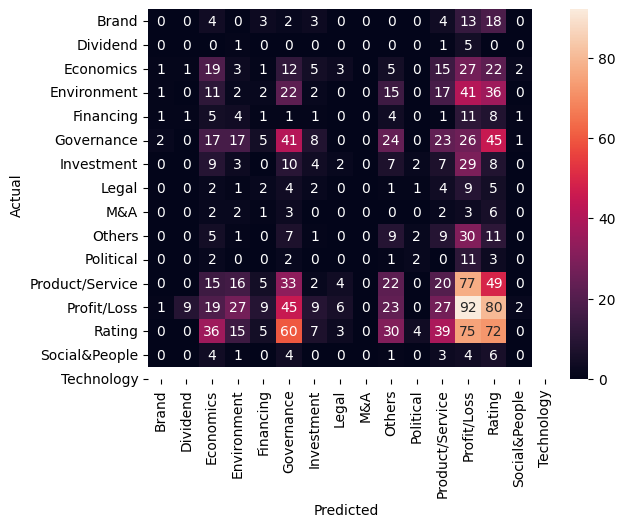

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(probs_test.labels,probs_test.preds)
print(model.score(X_test,y_test))

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ใช้งานจริง

In [ ]:
sample = ['โรงงานโออิชิฟู้ด เซอร์วิส ได้ดำเนินการปรับปรุงประสิทธิภาพกระบวนการผลิตปลาซาบะโดยนำระบบสายพานทดแทนการผลิตแบบเดิมสามารถลดการใช้วัตถุดิบลงได้ 10,000 กิโลกรัมต่อปี',
          'การให้ความช่วยเหลือลูกค้าของธนาคารที่ได้รับผลกระทบจากสถานการณ์การแพร่ระบาดของโรคติดเชื้อไวรัสโคโรนา 2019',
          'ธนาคารไทยพาณิชย์มีการปรับตัวและพัฒนาด้านเทคโนโลยี เพื่อตอบสนองต่อไลฟ์สไตล์ผู้บริโภคและภาคธุรกิจที่เปลี่ยนไปอย่างพอเพียงและรวดเร็ว',
          'ธนาคารให้ความสำคัญอย่างยิ่งต่อการพัฒนาระบบความปลอดภัยสารสนเทศ ซึ่งรวมถึงการเคารพและรักษาสิทธิของข้อมูล ความเป็นส่วนตัวของลูกค้า']
sample_feature = tfidf_fit.transform(sample)
model.predict(sample_feature)

array(['Environment', 'Social&People', 'Social&People', 'Social&People'],
      dtype=object)

In [ ]:
model_proba = model.predict_proba(sample_feature)
model_proba

array([[0.00438823, 0.00264637, 0.04195515, 0.46690401, 0.0168527 ,
        0.02036079, 0.01698312, 0.00625141, 0.00319269, 0.05966361,
        0.01405899, 0.2339503 , 0.0361405 , 0.00148008, 0.05993874,
        0.01523332],
       [0.02043458, 0.00533704, 0.09309781, 0.02754014, 0.02809226,
        0.09907379, 0.01204472, 0.01426337, 0.0057129 , 0.20318476,
        0.01191806, 0.08489957, 0.13344138, 0.00223627, 0.24662362,
        0.01209974],
       [0.01997702, 0.00369334, 0.09782183, 0.03289479, 0.01297738,
        0.06952814, 0.01525373, 0.00843261, 0.00488289, 0.12804574,
        0.01311572, 0.12591614, 0.04928716, 0.00186637, 0.39141903,
        0.02488811],
       [0.02099831, 0.0046979 , 0.0219506 , 0.02593044, 0.01649465,
        0.05988751, 0.01016675, 0.01155934, 0.00426674, 0.19924421,
        0.00721741, 0.13506875, 0.0258411 , 0.00166074, 0.37210472,
        0.08291085]])

Visualize

In [ ]:
df_aspect_normalized

,0,1,2,3
Brand,0.438823,2.043458,1.997702,2.099831
Dividend,0.264637,0.533704,0.369334,0.469790
Economics,4.195515,9.309781,9.782183,2.195060
Environment,46.690401,2.754014,3.289479,2.593044
Financing,1.685270,2.809226,1.297738,1.649465
Governance,2.036079,9.907379,6.952814,5.988751
Investment,1.698312,1.204472,1.525373,1.016675
Legal,0.625141,1.426337,0.843261,1.155934
M&A,0.319269,0.571290,0.488289,0.426674
Others,5.966361,20.318476,12.804574,19.924421


from matplotlib import pyplot as plt
_df_0[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import plotly.express as px

df_aspect = pd.DataFrame(model_proba, columns=['Brand', 'Dividend',	'Economics', 'Environment',	'Financing', 'Governance',
                                               'Investment', 'Legal', 'M&A', 'Others', 'Political', 'Product/Service', 'Profit/Loss',
                                               'Rating','Social&People','Technology'])

df_aspect = df_aspect.transpose()

df_aspect_normalized = df_aspect * 100

df_aspect_normalized.columns = df_aspect_normalized.columns.astype(str)

fig_aspect = px.pie(df_aspect_normalized, values=df_aspect_normalized.iloc[:, 1],
                       names= df_aspect_normalized.index,
                       title='Aspect Distribution',
                       labels={'index':'Aspect','1':'Percentage'})

description = f'{sample[1]}'
fig_aspect.update_layout(annotations=[dict(text=description, x=0.5, y=1.1, showarrow=False, xref='paper', yref='paper')])

fig_aspect.show()